# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [ ]:
#mount the Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#LOAD THE DATA
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/My Drive/water_potability.csv')

# Check for missing values
print("Missing values per column:")
print(dataset.isnull().sum())

# Impute missing values with the mean for ph, Sulfate, and Trihalomethanes
dataset['ph'].fillna(dataset['ph'].mean(), inplace=True)
dataset['Sulfate'].fillna(dataset['Sulfate'].mean(), inplace=True)
dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mean(), inplace=True)

# Check for missing values
print("Missing values per column:")
print(dataset.isnull().sum())

Missing values per column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Missing values per column:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


<ipython-input-24-605ac43473b5>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['ph'].fillna(dataset['ph'].mean(), inplace=True)
<ipython-input-24-605ac43473b5>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Plot the Data Appropriately

In [ ]:
# generate 2d classification dataset
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(x)
print(y)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.080795  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
2     8.099124  224.236259  19909.541732     9.275884  333.775777   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.775777   
3273  9.419510  175.762646  33155.578218     7.350233  333.775777   
3274  5.126763  230.603758  11983.869376     6.303357  333.775777   
3275  7.874671  195.102299  17404.177061     7.509306  333.775777   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [ ]:
# Split the data into training (70%), validation (15%), and testing (15%)

from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

# Each Member Defines their model Here

In [ ]:
def model_name_of_student_owen():

    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer + first hidden layer
        Dropout(0.3),  # Dropout to prevent overfitting
        Dense(32, activation='relu'),  # Second hidden layer
        Dropout(0.3),
        Dense(16, activation='relu'),  # Third hidden layer
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    #optimizer
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
#Model Definition by member 2
from tensorflow.keras.optimizers import SGD # Import SGD

def shema_ivan():
  model = Sequential([
      Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Use X_train_scaled
      Dropout(0.5),
      Dense(64, activation='relu'),
      Dropout(0.5),
      Dense(1, activation='sigmoid')
      ])
  return model

model = shema_ivan()

optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Start the training Process

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

y_pred = (model.predict(X_test_scaled, verbose=0) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print results
print(f"\nResults:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Potable', 'Potable']))

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5166 - loss: 0.7463 - val_accuracy: 0.6314 - val_loss: 0.6578
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5894 - loss: 0.6849 - val_accuracy: 0.6314 - val_loss: 0.6545
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6037 - loss: 0.6760 - val_accuracy: 0.6354 - val_loss: 0.6520
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5971 - loss: 0.6736 - val_accuracy: 0.6334 - val_loss: 0.6491
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6265 - loss: 0.6539 - val_accuracy: 0.6517 - val_loss: 0.6470
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6292 - loss: 0.6628 - val_accuracy: 0.6375 - val_loss: 0.6405
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6342 - loss: 0.6463 - val_accuracy: 0.6517 - val_loss: 0.6347
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6104 - loss: 0.6610 - val_accuracy: 0.6497 - val_loss:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


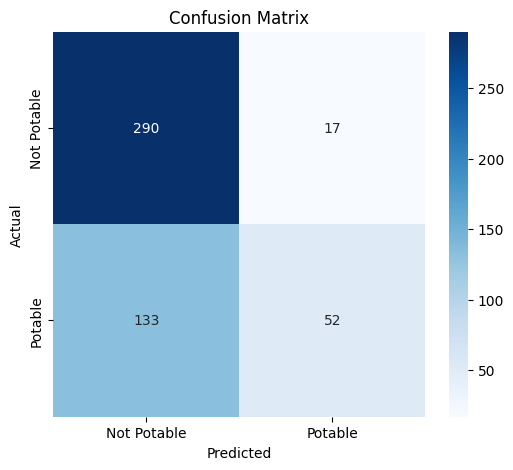

In [ ]:
#Confusion Matrix
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

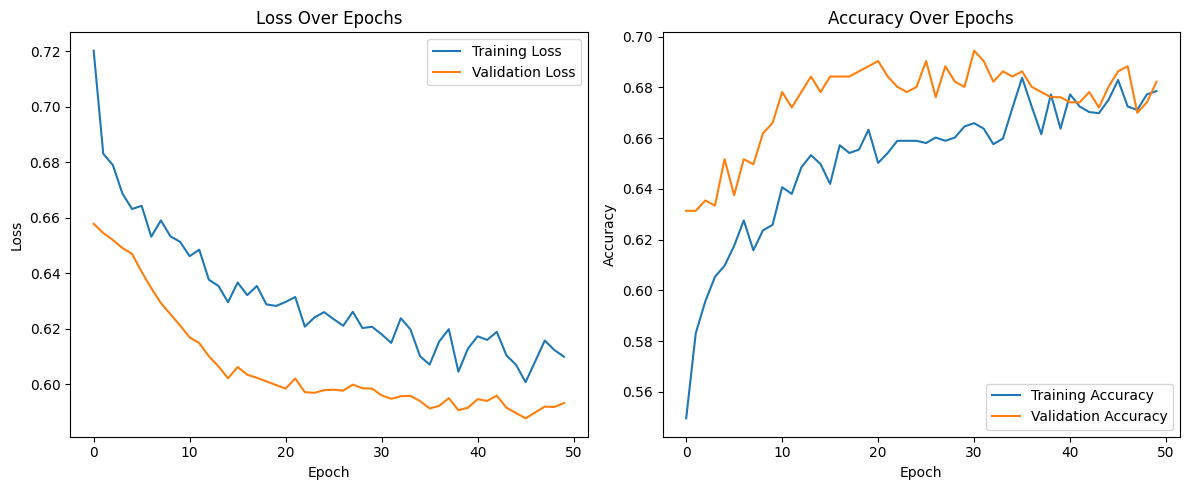

In [ ]:
#Loss Curves
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()